<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Models/blob/main/Digits_Recognition_MLP_and_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BASIC LIBRARIES
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# IMPORT DATASET OF DIGITS
from sklearn.datasets import load_digits

In [34]:
# DOWNLOAD DATASET OF DIGITS 8X8 PIXELS 10 CLASSES
data = load_digits(n_class=10)

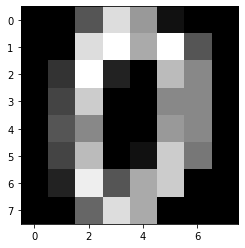

In [4]:
# SHOW ONE EXAMPLE OF DATASET
plt.imshow(data.images[0], 'gray')
plt.show()

In [5]:
# FILTERING DATA AND SCALE, INCRESING WHITE VALUES
data_fil = 60*data.data ** 0.5

In [ ]:
# IMPORT PRINCIPAL COMPONENTS ALGORITHM
from sklearn.decomposition import PCA

In [6]:
# REDUCING DIMENTIONS TO USE MULTILAYER PERCEPTRON
pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(data_fil)

# SHOW NEW SHAPE OF DATA 
converted_data.shape

(1797, 2)

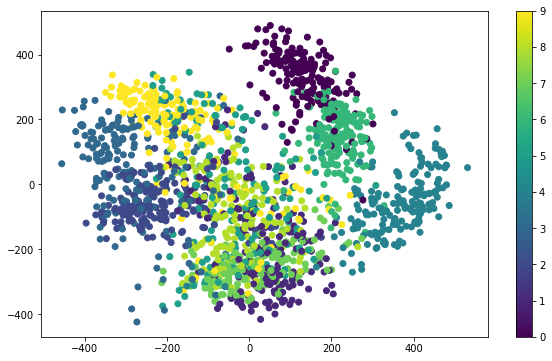

In [7]:
# PLOTTING DATA MAPPED IN 2 DIMENTIONS  (matrix) [[1,2,2,1,1],[1,3,4,2,1]] -> (1,2) (point)
plt.figure(figsize = (10,6))
plt.scatter(converted_data[:,0],converted_data[:,1] , c = data.target)
plt.colorbar()
plt.show()

In [8]:
# IMPORT MODULE TO SPLIT DATA IN TRAINING AND TESTING
from sklearn.model_selection import train_test_split

In [9]:
# 50% OF DATA FOR TESTING AND 50% FOR TRAINING
(X_train, X_test, y_train, y_test) = train_test_split(converted_data, 
                                                      data.target)

In [10]:
# IMPORT MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier

In [25]:
# CREATE MULTI-LAYER PERCEPTRON CLASSIFIER
clf = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=50,
                    hidden_layer_sizes=(15,15), random_state=1)

# TRAINING
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(15, 15), max_iter=50,
              random_state=1, solver='lbfgs')

In [26]:
# SCORE ACCURACY OF CLASSIFIER
clf.score(X_test, y_test)

0.8220244716351501

In [27]:
# GET PREDICTIONS
predicted = clf.predict(X_test)

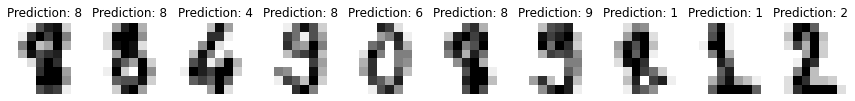

In [31]:
# SHOW PREDICTIONS AND IMAGE ITS CORRESPONDING ONE
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [21]:
# IMPORT SUPPORT VECTOR MACHINE AND METRICS TO SEE
from sklearn import svm, metrics

In [35]:
# FLATTEN IMAGES
digits = data
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# CREATE SVM CLASSIFIER
clf = svm.SVC(gamma=0.001)

# SPLIT DATA INTO 50% TRAINING AND 50% TESTING
X_train, X_test, y_train, y_test = train_test_split(
                                                  data, digits.target, 
                                                  test_size=0.5, shuffle=False )

# TRAINING
clf.fit(X_train, y_train)

# GET PREDICTIONS
predicted = clf.predict(X_test)


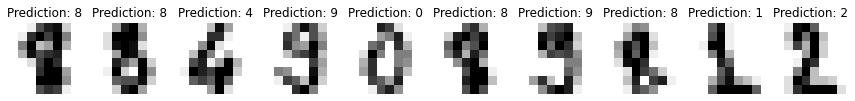

In [36]:
# SHOW PREDICTIONS AND IMAGE ITS CORRESPONDING ONE
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [37]:
# PRINT METRICS OF SVM CLASSIFIER 
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


